In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
dataframe = pd.read_csv('Zomato data .csv')

In [38]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [39]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


# Convert the data type of column -rate

In [40]:
def handleRate(value):
    value = str(value).split('/')
    value=value[0];
    return float(value)

dataframe['rate'] = data['rate'].apply(handleRate)
print(data.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [41]:
dataframe.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [42]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# Type of resturant

In [43]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'types of resturant')

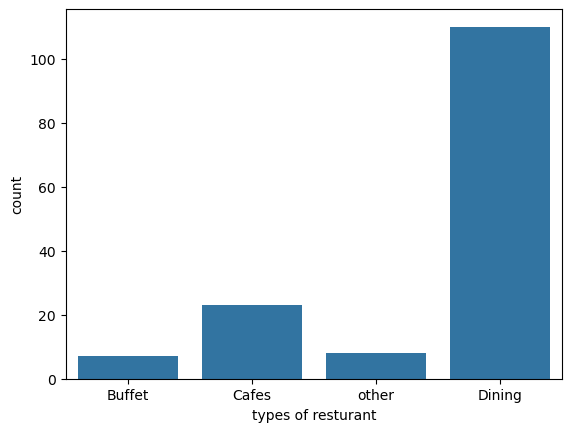

In [44]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("types of resturant")

# Conclusion -majority of the restrurant falls in dinning category

Text(0, 0.5, 'Votes')

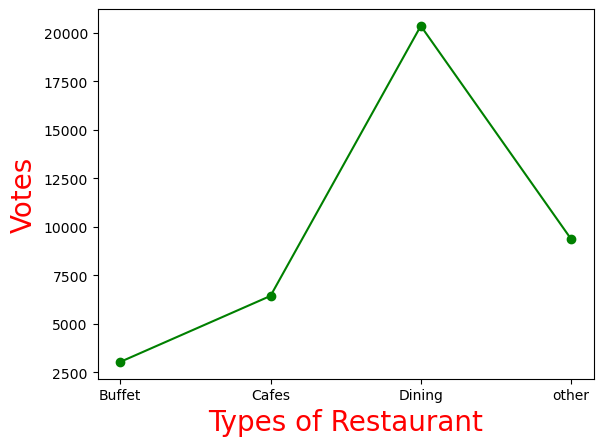

In [45]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Types of Restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)

# The majority rasturants recieved ratings

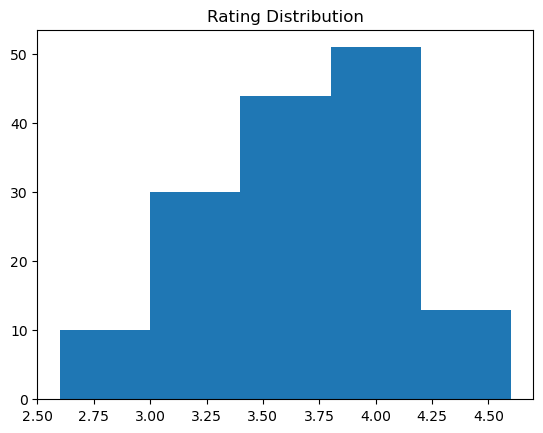

In [46]:
plt.hist(dataframe['rate'], bins=5)
plt.title("Rating Distribution")
plt.show()

# Conculation -the majority of restaurants received ratings ranging from 3.5 to 4.

# Average order spending by couples

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

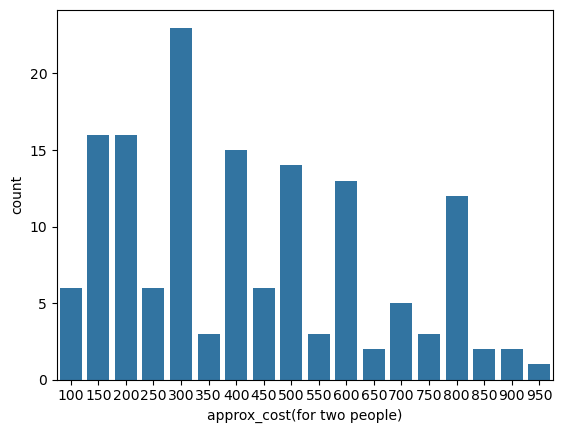

In [47]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

# Conclusion -the majority of couples prefer restuarants with an approximate cost of 300 rupees

# Wheather online orders receive higher ratings than offline orders

<Axes: xlabel='online_order', ylabel='rate'>

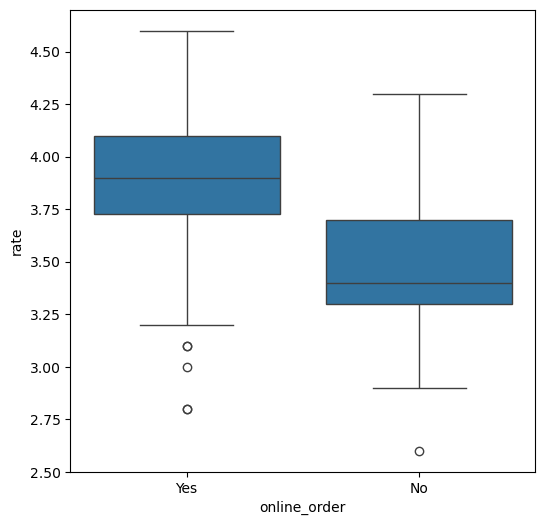

In [50]:
plt.figure(figsize =(6,6))
sns.boxplot(x = 'online_order', y = 'rate', data= dataframe)

# Conclusion -offline orders received lower ratings in comparision to online orders, which obtained excellent ratings

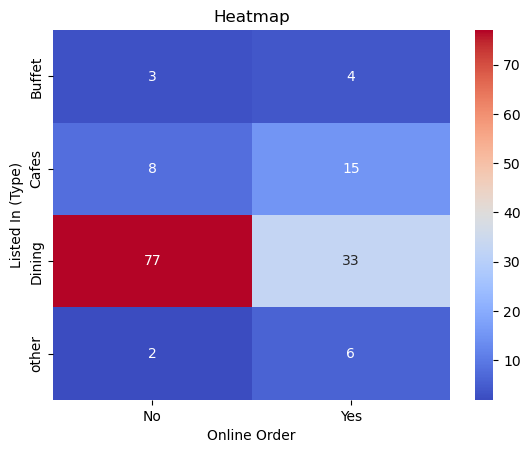

In [58]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns = 'online_order', aggfunc= 'size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='d')
plt.title("Heatmap")
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()

# Conlusion -Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This Suggests that cliesnt prefer to place orders in person at restuarants, but prefer online ordering at cafes 